In [0]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alonsopuente","key":"43b92568894be3bf825d7f1688950ec7"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Cambiamos los permisos
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d alonsopuente/kickstarter-projects-metadata
!ls

  0% 0.00/5.48M [00:00<?, ?B/s]
100% 5.48M/5.48M [00:00<00:00, 48.0MB/s]
kaggle.json  kickstarter-projects-metadata.zip	sample_data


In [0]:
!kaggle datasets download -d alonsopuente/kickstarter-projects-descriptions
!ls

 97% 34.0M/35.1M [00:00<00:00, 40.4MB/s]
100% 35.1M/35.1M [00:00<00:00, 79.0MB/s]
kaggle.json			       kickstarter-projects-metadata.zip
kickstarter-projects-descriptions.zip  sample_data


In [0]:
import pandas as pd
import glob
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from pandas import Series
import math
import os
from sklearn import preprocessing
import zipfile
import glob
import shutil
from pandas import Series, DataFrame 

In [0]:
os.mkdir('folder')
zip_train_test_md = zipfile.ZipFile('kickstarter-projects-metadata.zip','r')
zip_train_test_md.extractall()
zip_train_test_md.close()

zip_train_test_dsc = zipfile.ZipFile('kickstarter-projects-descriptions.zip','r')
zip_train_test_dsc.extractall()
zip_train_test_dsc.close()

os.rename('kickstarter-projects-metadata.zip','folder/kickstarter-projects-metadata.zip')
os.rename('kickstarter-projects-descriptions.zip','folder/kickstarter-projects-descriptions.zip')

shutil.rmtree('folder')

# Metainformación

## Data escrapeada de Web Robots

In [0]:
data_final = pd.read_csv("Data final limpia.csv",sep = ',')
data_final.head()

,id,backers_count,name,blurb,category,photo,urls,city,country,goal,pledged,currency,usd_pledged,created_at,launched_at,deadline,duration,state
0,1000245024,0,Safer Home,Placing furniture against traditional plugs is...,Hardware,https://ksr-ugc.imgix.net/assets/011/663/874/0...,https://www.kickstarter.com/projects/homesafet...,Kamloops,CA,50000.0,0.0,CAD,0.000000,"March 09, 2014","June 03, 2015","July 03, 2015",30,failed
1,1000256230,0,Shreddit - Privacy on Reddit,"Shreddit, a Reddit privacy tool I created and ...",Software,https://ksr-ugc.imgix.net/assets/013/466/903/0...,https://www.kickstarter.com/projects/466914929...,Edinburgh,GB,2000.0,0.0,GBP,0.000000,"August 23, 2016","June 02, 2017","July 02, 2017",30,failed
2,1000261018,3,Diposta - liberating people from their postal ...,The problem of mail: it is physical! Diposta c...,Web,https://ksr-ugc.imgix.net/assets/012/071/808/1...,https://www.kickstarter.com/projects/105350477...,Raleigh,US,100000.0,141.0,USD,141.000000,"March 17, 2015","July 24, 2016","August 23, 2016",30,failed
3,100039820,3,Best Spray Bottle Ever - SureShot,Ever had a spray bottle that has a little bit ...,Gadgets,https://ksr-ugc.imgix.net/assets/012/009/461/3...,https://www.kickstarter.com/projects/110136848...,Edmonton,CA,25000.0,3.0,CAD,2.411101,"January 22, 2015","February 05, 2015","March 07, 2015",30,failed
4,1000468345,6,The iRNinja - Simplify your TV with a wireless...,Control your TV & Audio/Video components by pr...,Gadgets,https://ksr-ugc.imgix.net/assets/016/561/251/1...,https://www.kickstarter.com/projects/5877985/i...,Jupiter,US,500.0,74.0,USD,74.000000,"April 27, 2017","May 10, 2017","June 14, 2017",35,failed


## Análisis de los datos

### Variable dependiente (Y)

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns

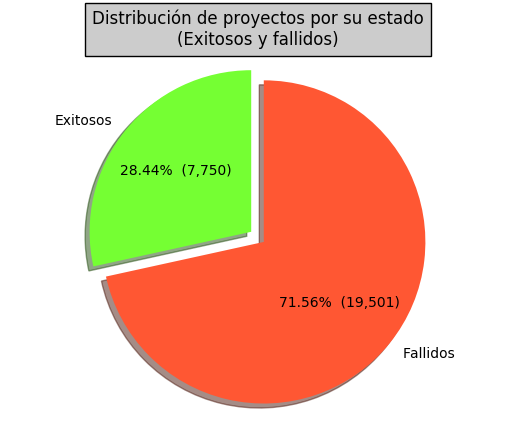

In [0]:
# Gráfico de pie para estado de proyectos
# Fuente: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html?highlight=pie%20chart

plt.rcdefaults()

labels_state = 'Exitosos','Fallidos'
values_state = [len(data_final[data_final['state'] == 'successful']), len(data_final[data_final['state'] == 'failed'])]
colors_state = ["#75FF33", "#FF5733"]
explode_state = (0, 0.1)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values_state)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:,})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(values_state, explode=explode_state, labels=labels_state, colors=colors_state, autopct=make_autopct(values_state),
        shadow=True, startangle=90)
ax1.axis('equal')  # Para dibujar pie como un círculo

plt.title("Distribución de proyectos por su estado\n"+"(Exitosos y fallidos)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#savefig("projects state.png")

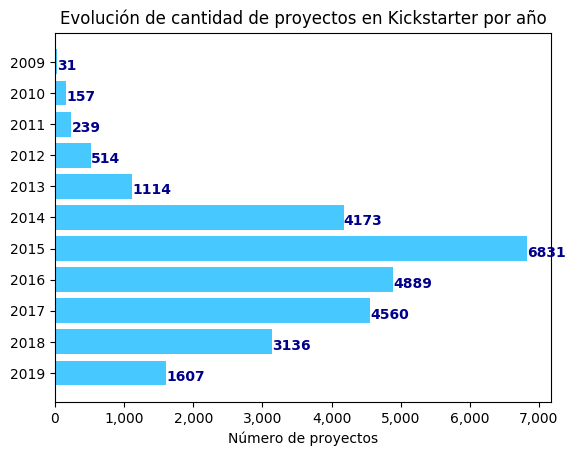

In [0]:
# Gráfico de barras para proyectos por año
# Fuente: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html
fig, ax = plt.subplots()

projects_by_year = []
labels_year = []
for i in range(2009,2020):
  projects_by_year.append(len(data_final[data_final['deadline'].str.contains(str(i))]))
  #projects_by_year.append('{:,}'.format(len(data_final[data_final['deadline'].str.contains(str(i))])))
  labels_year.append(i)

y_pos = np.arange(len(labels_year))

ax.barh(y_pos, projects_by_year, facecolor='#47C9FF', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_year)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Número de proyectos')
ax.set_title('Evolución de cantidad de proyectos en Kickstarter por año')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

for i, v in enumerate(projects_by_year):
    ax.text(v + 3, i + .25, str(v), color='darkblue', fontweight='bold')

plt.show()

#savefig("projects by year.png")

In [0]:
#Para conocer la distribución de los registros, agrupados por año
print("CANTIDAD DE PROYECTOS POR AÑO")
for i in range(2009,2020):
  print(i,':',round((len(data_final[data_final['deadline'].str.contains(str(i))])/len(data_final))*100,2),'%',' -  # registros:',len(data_final[data_final['deadline'].str.contains(str(i))]),sep="\t")
  
print('Total de proyectos: ',len(data_final[data_final['deadline'].str.contains("2009")])+len(data_final[data_final['deadline'].str.contains("2010")])+len(data_final[data_final['deadline'].str.contains("2011")])+len(data_final[data_final['deadline'].str.contains("2012")])+len(data_final[data_final['deadline'].str.contains("2013")])+len(data_final[data_final['deadline'].str.contains("2014")])+len(data_final[data_final['deadline'].str.contains("2015")])+len(data_final[data_final['deadline'].str.contains("2016")])+len(data_final[data_final['deadline'].str.contains("2017")])+len(data_final[data_final['deadline'].str.contains("2018")])+len(data_final[data_final['deadline'].str.contains("2019")]))

CANTIDAD DE PROYECTOS POR AÑO
2009	:	0.11	%	 -  # registros:	31
2010	:	0.58	%	 -  # registros:	157
2011	:	0.88	%	 -  # registros:	239
2012	:	1.89	%	 -  # registros:	514
2013	:	4.09	%	 -  # registros:	1114
2014	:	15.31	%	 -  # registros:	4173
2015	:	25.07	%	 -  # registros:	6831
2016	:	17.94	%	 -  # registros:	4889
2017	:	16.73	%	 -  # registros:	4560
2018	:	11.51	%	 -  # registros:	3136
2019	:	5.9	%	 -  # registros:	1607
Total de proyectos:  27251


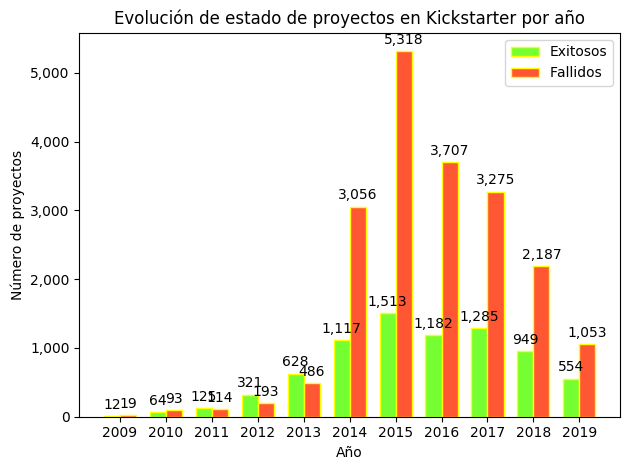

In [0]:
#Para sacar los valores del estado final del proyecto, agrupados por año
successful_by_year = []
failed_by_year = []
for i in range(2009,2020):
  successful_by_year.append(len(data_final[(data_final['state'] == 'successful') & (data_final['deadline'].str.contains(str(i)))]))
  failed_by_year.append(len(data_final[(data_final['state'] == 'failed') & (data_final['deadline'].str.contains(str(i)))]))
  

# Visualización de datos
# Fuente: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, successful_by_year, width, label='Exitosos', facecolor='#75FF33', edgecolor='yellow')
rects2 = ax.bar(x + width/2, failed_by_year, width, label='Fallidos', facecolor='#FF5733', edgecolor='yellow')


# Agregando las etiquetas y otros detalles a los ejes
ax.set_ylabel('Número de proyectos')
ax.set_xlabel('Año')
ax.set_title('Evolución de estado de proyectos en Kickstarter por año')
ax.set_xticks(x)
ax.set_xticklabels(labels_year)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))  #Para formatear los miles con comas
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#savefig("projects state by year.png")

### Variables independientes (X)

In [0]:
# Proyectos que no tienen imágenes re-dimensionadas ni descripciones
rows_to_delete = [1000245024, 1027265164, 1041765851, 1044019703, 1054657017, 1054989753, 1093227359, 1095756934, 1109096552,
 1110674316, 111350551, 1117138764, 1120478809, 1123861916, 1126827678, 1128156438, 1150700505, 1167178681, 1167412504, 1171176145,
 1185235157, 1195689824, 1196260545, 1196669776, 1227245909, 123026865, 1232162171, 125404469, 1256302160, 1260054574, 1261576550,
 1271185952, 1271697108, 1273321043, 1276268664, 1295436613, 1312887410, 1315773773, 1318933353, 1330209033, 1335140848, 1354201116,
 1357780406, 1377366770, 1379915496, 1382999730, 1383492624, 1383895969, 1417511404, 1431552184, 1433514155, 1440484529, 1453210615,
 1469999815, 1471392588, 147705510, 1480127219, 1501633851, 1519017410, 1525962954, 1536346646, 1551702099, 1557905272, 1580025170,
 1596683891, 1597639357, 1600980167, 1605451234, 1605534062, 1607478408, 1651175038, 1658387069, 1659350880, 1675183980, 1676089131,
 1685376331, 170619371, 1706658113, 1718840874, 172918236, 175239779, 1758745650, 1761301134, 1765651455, 1777726903, 1779005619,
 1789344584, 1791360247, 1792121743, 1795218040, 1806016777, 1811667704, 1818375181, 1822464577, 1838083992, 1852798207, 185563912,
 186326896, 1886853211, 1895840022, 1912915346, 1912916865, 1916794128, 1924131875, 1931946499, 1933459780, 1942409900, 194542013,
 1948690055, 195935865, 1972722926, 1976430969, 1986576162, 1986844872, 2035788565, 2056552145, 2094632032, 210942640, 211982757,
 2122235677, 2130212538, 2133337075, 215329000, 225178854, 230988891, 241210115, 268503228, 268595326, 282962466, 295300250,
 299064543, 32792165, 358879397, 385003810, 398816783, 405697911, 408987268, 41416256, 420078999, 422991637, 431444590, 45179890,
 455670673, 463339053, 466663836, 471806030, 472068165, 480355077, 49755697, 497564918, 513560589, 515623736, 52687056, 529090953,
 537175035, 545791182, 552855493, 561835082, 569931566, 579260709, 579865810, 583266930, 607713968, 622990457, 626229332, 631512515,
 641599646, 646676789, 658977839, 661260786, 679530293, 688235297, 71055019, 718312567, 733153564, 733447376, 748065478, 752848586,
 794223432, 802437399, 805880945, 814433703, 814709614, 835270646, 837611249, 857130732, 857846936, 87114884, 874656260, 884696456,
 894319374, 912105626, 914270204, 91444505, 916080730, 934292049, 939431746, 943847278, 947601096, 949851993, 951887123, 952231046,
 953415668, 953814050, 958225997, 962905414, 965265217, 97315852, 983812442, 984297627, 99033008, 999748644, 999753943, 99996661,
                 1642806426, 365370629]

In [0]:
# Borrando los índices de cada proyecto de la lista de imágenes a eliminar
indexNames = data_final[data_final['id'].isin(rows_to_delete)].index
data_final_nueva = data_final.drop(indexNames , inplace=True)
data_final_nueva = data_final.iloc[:,:]
data_final_nueva.head(6)

,id,backers_count,name,blurb,category,photo,urls,city,country,goal,pledged,currency,usd_pledged,created_at,launched_at,deadline,duration,state
1,1000256230,0,Shreddit - Privacy on Reddit,"Shreddit, a Reddit privacy tool I created and ...",Software,https://ksr-ugc.imgix.net/assets/013/466/903/0...,https://www.kickstarter.com/projects/466914929...,Edinburgh,GB,2000.0,0.0,GBP,0.000000,"August 23, 2016","June 02, 2017","July 02, 2017",30,failed
2,1000261018,3,Diposta - liberating people from their postal ...,The problem of mail: it is physical! Diposta c...,Web,https://ksr-ugc.imgix.net/assets/012/071/808/1...,https://www.kickstarter.com/projects/105350477...,Raleigh,US,100000.0,141.0,USD,141.000000,"March 17, 2015","July 24, 2016","August 23, 2016",30,failed
3,100039820,3,Best Spray Bottle Ever - SureShot,Ever had a spray bottle that has a little bit ...,Gadgets,https://ksr-ugc.imgix.net/assets/012/009/461/3...,https://www.kickstarter.com/projects/110136848...,Edmonton,CA,25000.0,3.0,CAD,2.411101,"January 22, 2015","February 05, 2015","March 07, 2015",30,failed
4,1000468345,6,The iRNinja - Simplify your TV with a wireless...,Control your TV & Audio/Video components by pr...,Gadgets,https://ksr-ugc.imgix.net/assets/016/561/251/1...,https://www.kickstarter.com/projects/5877985/i...,Jupiter,US,500.0,74.0,USD,74.000000,"April 27, 2017","May 10, 2017","June 14, 2017",35,failed
5,1000551777,12,Gantish - Online Reward Chart Creator for Parents,"Taking the novelty out of reward charts, and m...",Software,https://ksr-ugc.imgix.net/assets/012/223/719/4...,https://www.kickstarter.com/projects/gantish/g...,Mullingar,IE,4000.0,282.0,EUR,313.300263,"August 13, 2015","August 17, 2015","September 16, 2015",30,failed
6,1000558429,1,Sellegg start up classified site,a simple and user freindly version of craigslist,Web,https://ksr-ugc.imgix.net/assets/012/393/161/0...,https://www.kickstarter.com/projects/967612940...,Detroit,US,15000.0,25.0,USD,25.000000,"February 28, 2016","March 02, 2016","March 20, 2016",18,failed


In [0]:
len(data_final_nueva)

27035

In [0]:
# Borrando los índices de cada proyecto de la lista de imágenes a eliminar
indexNames = data_final[data_final['id'].isin(rows_to_delete)].index
X = data_final.drop(indexNames , inplace=True)
X = data_final.iloc[:, [1,9,10,16]]
X.head(6)

,backers_count,goal,pledged,duration
1,0,2000.0,0.0,30
2,3,100000.0,141.0,30
3,3,25000.0,3.0,30
4,6,500.0,74.0,35
5,12,4000.0,282.0,30
6,1,15000.0,25.0,18


In [0]:
from sklearn import preprocessing
x1 = X[['backers_count']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
X = pd.DataFrame(x_scaled)
X = X.rename(columns={0: "backers_count", 1: "goal", 2:"pledged", 3:"duration"})
X.columns

Index(['backers_count', 'goal', 'pledged', 'duration'], dtype='object')

In [0]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
backers_count,27035.0,0.001977,0.011176,0.0,0.000019,0.000085,0.000661,1.0
goal,27035.0,0.000879,0.011085,0.0,0.000050,0.000180,0.000500,1.0
pledged,27035.0,0.002000,0.013076,0.0,0.000001,0.000029,0.000464,1.0
duration,27035.0,0.378552,0.130054,0.0,0.318681,0.318681,0.428571,1.0


In [0]:
# Borrando los índices de cada proyecto de la lista de imágenes a eliminar
indexNames = data_final[data_final['id'].isin(rows_to_delete)].index
Y = data_final.drop(indexNames , inplace=True)
Y = data_final.iloc[:,-1]
Y = Y.apply(lambda x: 1 if x == 'successful' else 0)
Y.head(8)

1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
Name: state, dtype: int64

In [0]:
data_final_nueva.iloc[:, [1,9,10,12,16]].corr()

,backers_count,goal,pledged,usd_pledged,duration
backers_count,1.000000,0.001053,0.487119,0.716463,0.027078
goal,0.001053,1.000000,0.072464,0.006088,0.038666
pledged,0.487119,0.072464,1.000000,0.681205,0.032881
usd_pledged,0.716463,0.006088,0.681205,1.000000,0.032476
duration,0.027078,0.038666,0.032881,0.032476,1.000000


(5.0, 0.0)

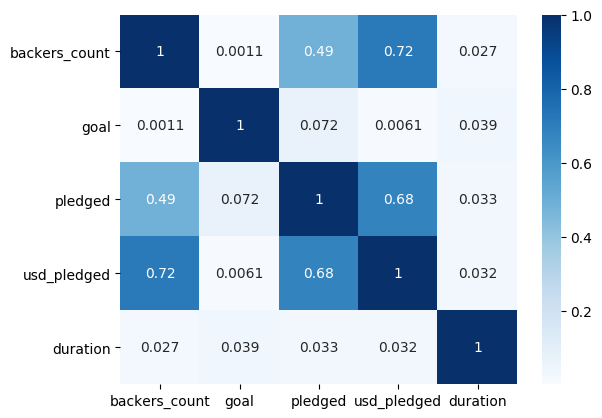

In [0]:
#plt.rcdefaults()
ax_corr = sns.heatmap(data_final_nueva.iloc[:, [1,9,10,12,16]].corr(), annot=True, cmap = "Blues")
bottom, top = ax_corr.get_ylim()
ax_corr.set_ylim(bottom + 0.5, top - 0.5)

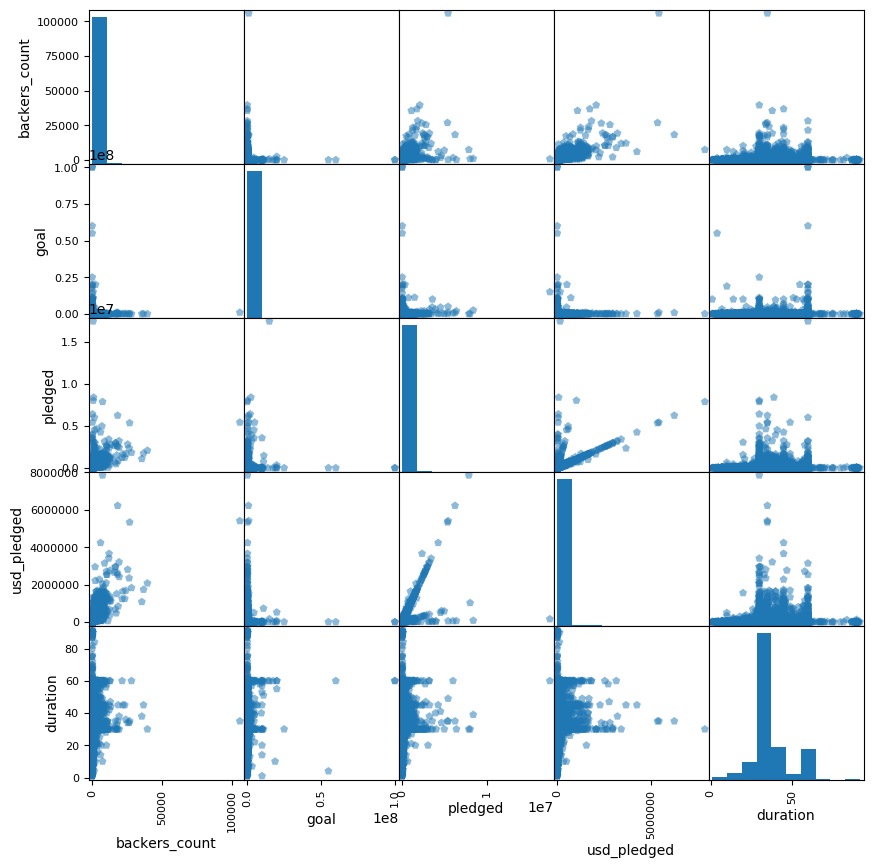

In [0]:
pd.plotting.scatter_matrix(data_final_nueva.iloc[:, [1,9,10,12,16,17]], figsize= (10,10), marker = "p")
plt.show()

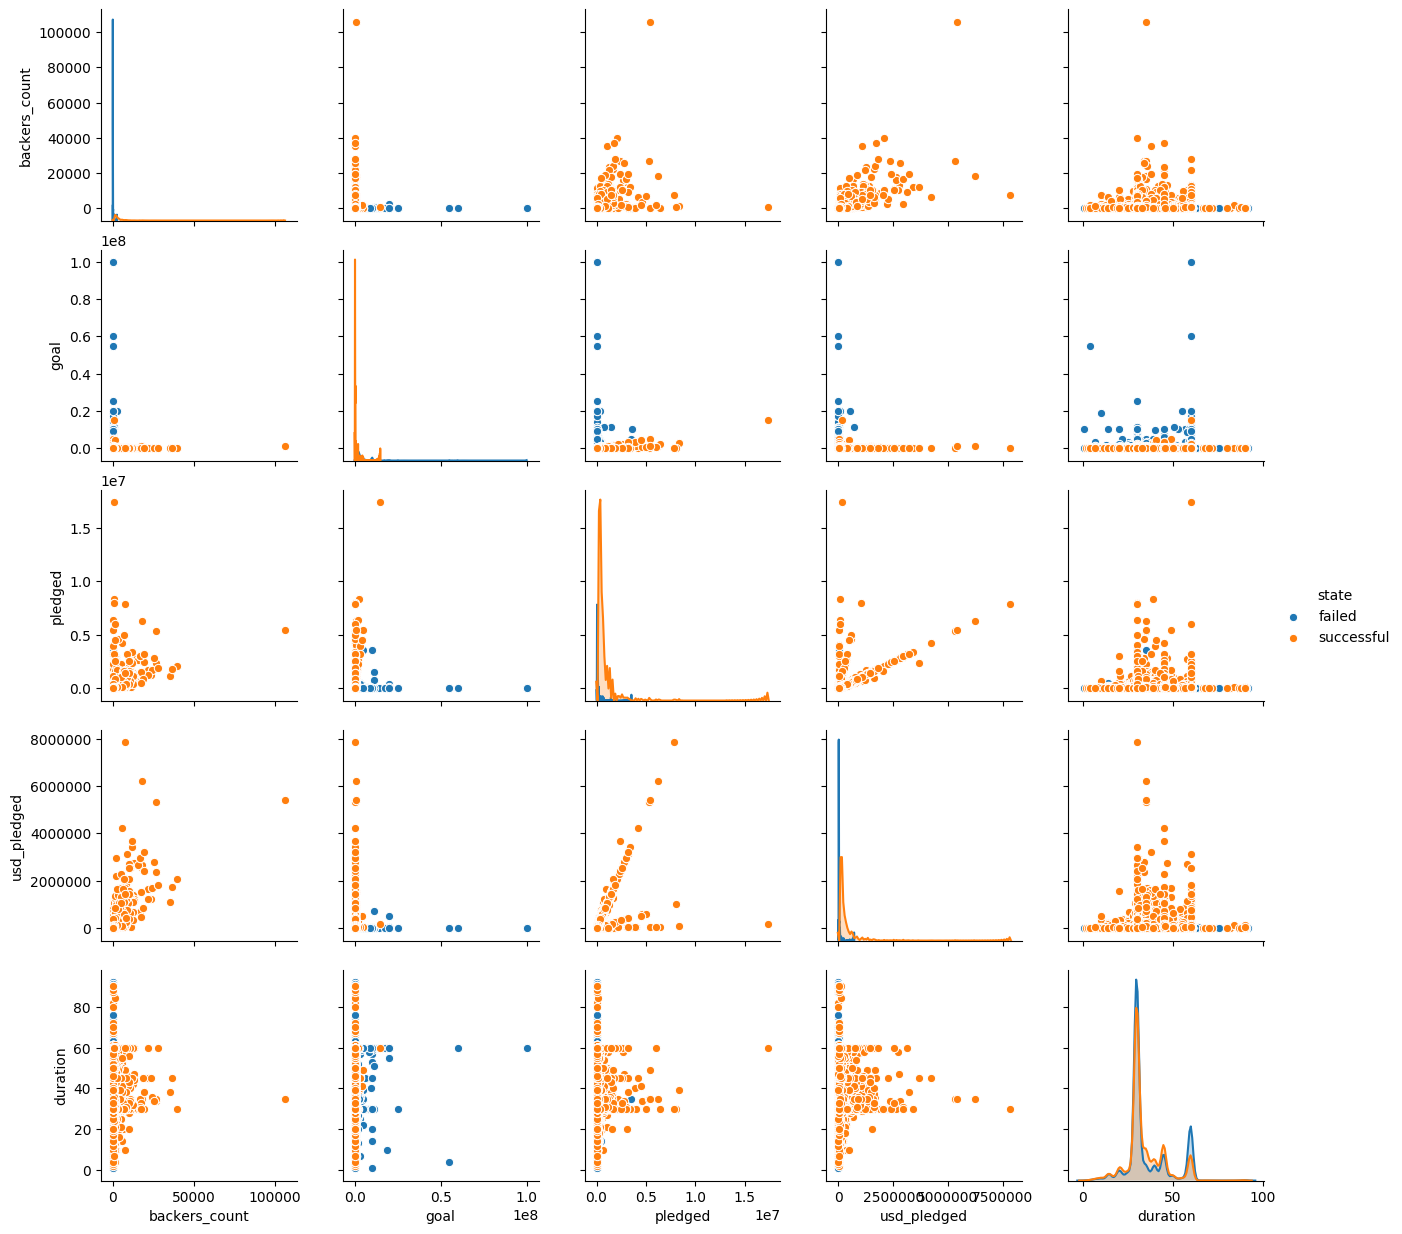

In [0]:
sns.pairplot(data_final_nueva.iloc[:, [1,9,10,12,16,17]], hue = "state")     #Segmenta cada clase
plt.show()

Ver este link sobre standarization y normalization:
*   https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
*   https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis



Fuente principal standarization: https://datascience.stackexchange.com/questions/16699/is-standardization-needed-before-using-scikit-learn-svm

In [0]:
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,auc, roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (LabelEncoder,OneHotEncoder, StandardScaler)  
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import keras
import math
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


## Separando data original en train y test

In [0]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Conjunto de datos</b>','<b>Total</b>','<b>%</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Entrenamiento', 'Prueba'],
      [round(len(data_final_nueva)*0.80), round(len(data_final_nueva)*0.20)],
      [80, 20]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

#savefig("resume table.png")

In [0]:
# Importando función train_test_split
from sklearn.model_selection import train_test_split

train_ratio = 0.80
test_ratio = 0.20

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train_exp3, x_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(X, Y, test_size=1 - train_ratio, random_state=80)

print(x_train_exp3,  x_test_exp3)

       backers_count      goal  pledged  duration
11857              0    1500.0      0.0        35
13393              1   10000.0     25.0        30
10127              5   50000.0    301.0        30
17909             71   50000.0  11452.0        35
20055            107   15000.0  15846.0        30
...              ...       ...      ...       ...
8784             168    5000.0  24780.0        30
2276               8    5000.0     65.0        30
19511             55  179900.0  11469.0        30
5351              40   10000.0   5436.0        30
17716              3   55500.0    385.0        30

[21628 rows x 4 columns]        backers_count       goal   pledged  duration
18422              3     1700.0     80.00        30
1448               3    25000.0    107.00        60
2632              13   350000.0   9352.00        35
13694              4  1000000.0    352.00        30
4086               5    50000.0    375.00        32
...              ...        ...       ...       ...
14832     

In [0]:
print(len(x_train_exp3), len(x_test_exp3))

21628 5407


In [0]:
x_test_exp3.iloc[8]

backers_count       7257.0
goal              100000.0
pledged          1688179.6
duration              49.0
Name: 20701, dtype: float64

In [0]:
np.save('metadata_X_train.npy', x_train_exp3)
np.save('metadata_X_test.npy', x_test_exp3)

In [0]:
np.save('metadata_Y_train.npy', y_train_exp3)
np.save('metadata_Y_test.npy', y_test_exp3)

## Primer modelo: Support Vector Machine

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.optimizers as optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [ 1, 10, 100, 1000],
              'gamma': [ 0.1, 0.01, 0.001, 0.0001], }
clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_exp3, y_train_exp3)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
print(clf.best_params_)

{'C': 1000, 'gamma': 0.1}


In [0]:
#Importando modelo de SVM
from sklearn import svm

#Creando un clasificador de SVM
clf = svm.SVC(kernel='linear', C=1000, gamma =0.1, class_weight='balanced', probability=True) # Kernel lineal
#clf = CalibratedClassifierCV(clf) 

from datetime import datetime
start = datetime.now()

#Entrenando el modelo usando conjuntos de entrenamiento
clf.fit(x_train_exp3, y_train_exp3)

stop=datetime.now()

execution_time_exp3 = stop-start

#Prediciendo la respuesta para el conjunto de datos de prueba
y_pred_exp3 = clf.predict(x_test_exp3)

In [0]:
execution_time_exp3

datetime.timedelta(0, 54, 80405)

In [0]:
pred_class = clf.predict(x_test_exp3)
probability = clf.predict_proba(x_test_exp3)

In [0]:
print(pred_class[0:10],probability[0:10])

[0 0 0 0 0 0 0 1 1 0] [[8.88478439e-01 1.11521561e-01]
 [9.18152249e-01 8.18477514e-02]
 [9.96052019e-01 3.94798125e-03]
 [9.99998909e-01 1.09133717e-06]
 [9.30803249e-01 6.91967505e-02]
 [9.57921614e-01 4.20783859e-02]
 [8.86094843e-01 1.13905157e-01]
 [1.25497629e-08 9.99999987e-01]
 [3.00000090e-14 1.00000000e+00]
 [8.98088273e-01 1.01911727e-01]]


(2.5, -0.5)

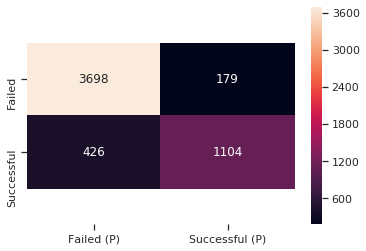

In [0]:
#Importando métricas de scikit-learn para calcular precisión
from sklearn import metrics

conf_exp3 = metrics.confusion_matrix(y_test_exp3, y_pred_exp3, labels = [0,1])
label_y = ['Failed','Successful']
label_x = ['Failed (P)', 'Successful (P)']
ax_exp3 = sns.heatmap(conf_exp3, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".0f")
bottom, top = ax_exp3.get_ylim()
ax_exp3.set_ylim(bottom + 0.5, top - 0.5)

In [0]:
print('Confusion Matrix')
print(confusion_matrix(y_test_exp3, y_pred_exp3))
print('Classification Report')
target_names = ['Failed','Successful']
print(classification_report(y_test_exp3, y_pred_exp3, target_names=target_names))

Confusion Matrix
[[3698  179]
 [ 426 1104]]
Classification Report
              precision    recall  f1-score   support

      Failed       0.90      0.95      0.92      3877
  Successful       0.86      0.72      0.78      1530

    accuracy                           0.89      5407
   macro avg       0.88      0.84      0.85      5407
weighted avg       0.89      0.89      0.88      5407



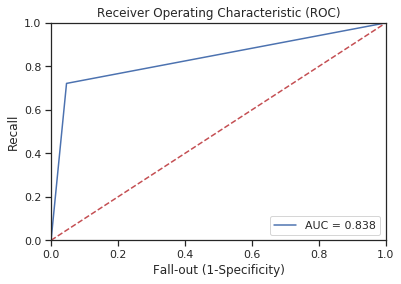

AUC score: 0.837699454298098


In [0]:
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test_exp3, y_pred_exp3)
roc_auc_exp3 = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_exp3)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_exp3)

In [0]:
gini_exp3 = (roc_auc_exp3 - 0.5) * 2
accuracy_exp3 = metrics.accuracy_score(y_test_exp3, y_pred_exp3)
f1_score_exp3 = metrics.f1_score(y_test_exp3, y_pred_exp3)
recall_score_exp3 = metrics.recall_score(y_test_exp3, y_pred_exp3)

In [0]:
svm_weights = clf.coef_
dataframe_svm_weights = pd.DataFrame(svm_weights.T, columns=['svm_weights']) 
print (dataframe_svm_weights)
dataframe_svm_weights.to_csv('metada_svm_weights.csv', index = None, header=True)

   svm_weights
0  1034.314962
1  -735.527352
2   558.167895
3    -0.135228


## Segundo modelo: Red Neuronal Multicapa

In [0]:
from sklearn import metrics
import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
model = Sequential([
  Dense(4, use_bias=False, input_shape=(4,)),
  BatchNormalization(),
  Activation("relu"),
  Dropout(0.25),
  Dense(128, use_bias=False),
  BatchNormalization(),
  Activation("relu"),
  Dropout(0.25),
  Dense(1, activation ='sigmoid'),
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


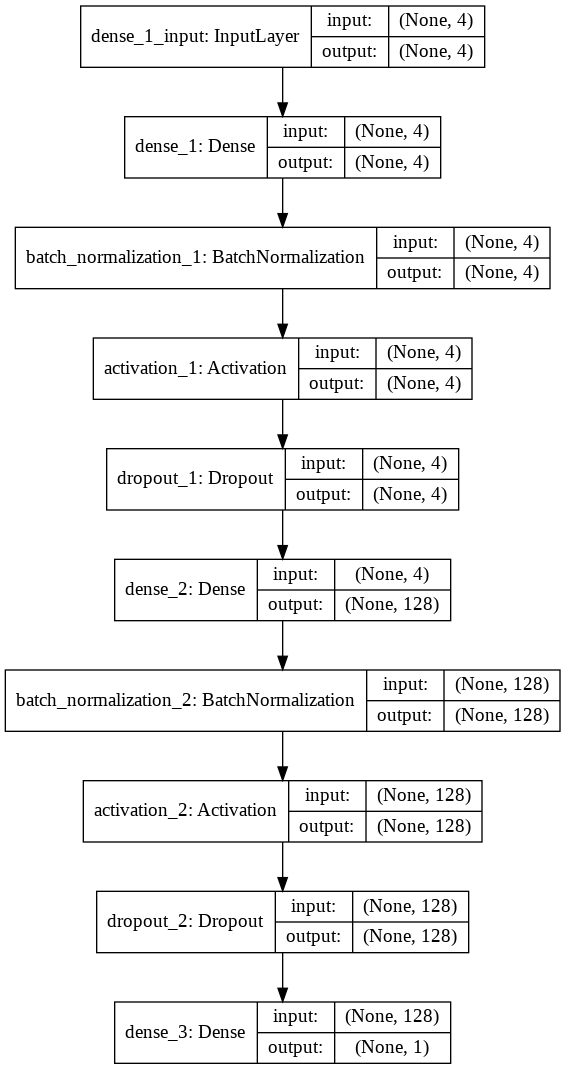

In [0]:
plot_model(model, to_file='model_MLN.png', show_shapes=True, show_layer_names=True)

In [0]:
from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', np.unique(Y), Y)
print(sample_weights)

[0.69912077 1.75551948]


In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5, rho=0.8), metrics=[auc])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.








In [0]:
# (5) Train
Xt2 = np.concatenate((x_train_exp3, x_test_exp3))
Yt2 = np.concatenate((y_train_exp3, y_test_exp3))

from datetime import datetime
start = datetime.now()

hist = model.fit(Xt2, Yt2, batch_size=32, epochs=350, validation_split=0.15, verbose=1, class_weight=sample_weights,
                    shuffle = True)

stop=datetime.now()
execution_time_rna = stop-start

#history_cpu = model.fit(X_train,Y_train, batch_size=32, epochs=4,validation_data=(X_test,Y_test),verbose=1)
score = model.evaluate(x_test_exp3, y_test_exp3,verbose=1)
print('Test loss: ',score[0])
print('Test AUC: ',score[1])



Train on 22979 samples, validate on 4056 samples
Epoch 1/350
22979/22979 [==============================] - 8s 343us/step - loss: 0.7705 - auc: 0.5080 - val_loss: 0.6554 - val_auc: 0.5152
Epoch 2/350
22979/22979 [==============================] - 7s 284us/step - loss: 0.6796 - auc: 0.5258 - val_loss: 0.6089 - val_auc: 0.5330
Epoch 3/350
22979/22979 [==============================] - 7s 292us/step - loss: 0.6343 - auc: 0.5400 - val_loss: 0.5865 - val_auc: 0.5468
Epoch 4/350
22979/22979 [==============================] - 7s 290us/step - loss: 0.6139 - auc: 0.5514 - val_loss: 0.5755 - val_auc: 0.5559
Epoch 5/350
22979/22979 [==============================] - 7s 288us/step - loss: 0.5972 - auc: 0.5603 - val_loss: 0.5676 - val_auc: 0.5635
Epoch 6/350
22979/22979 [==============================] - 7s 290us/step - loss: 0.5863 - auc: 0.5676 - val_loss: 0.5633 - val_auc: 0.5705
Epoch 7/350
22979/22979 [==============================] - 7s 290us/step - loss: 0.5777 - auc: 0.5740 - val_loss: 0

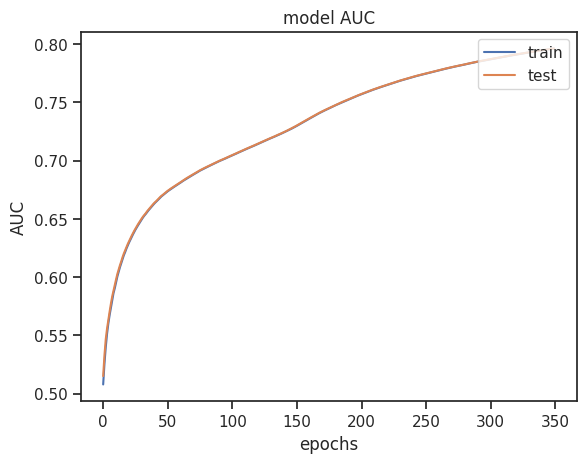

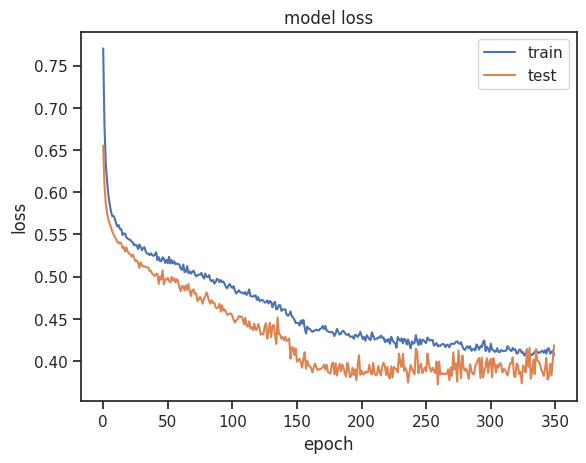

In [0]:
# summarize history for loss
plt.figure(1)
plt.plot(hist.history['auc'])
plt.plot(hist.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

5407/5407 [==============================] - 0s 59us/step


(2.0, 0.0)

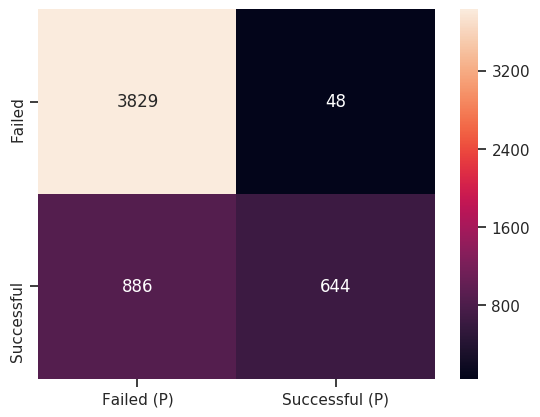

In [0]:
#Importando métricas de scikit-learn para calcular precisión
from sklearn import metrics

y_pred = model.predict(x_test_exp3.to_numpy(),verbose=1).ravel()
y_pred = np.round(y_pred)

conf_rna = metrics.confusion_matrix(y_test_exp3, y_pred, labels = [0,1])
label_y = ['Failed','Successful']
label_x = ['Failed (P)', 'Successful (P)']
ax_rna = sns.heatmap(conf_rna, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".0f")
bottom, top = ax_rna.get_ylim()
ax_rna.set_ylim(bottom + 0.5, top - 0.5)

In [0]:
print('Confusion Matrix')
print(confusion_matrix(y_test_exp3, y_pred))
print('Classification Report')
target_names = ['Failed','Successful']
print(classification_report(y_test_exp3, y_pred, target_names=target_names))

Confusion Matrix
[[3829   48]
 [ 886  644]]
Classification Report
              precision    recall  f1-score   support

      Failed       0.81      0.99      0.89      3877
  Successful       0.93      0.42      0.58      1530

    accuracy                           0.83      5407
   macro avg       0.87      0.70      0.74      5407
weighted avg       0.85      0.83      0.80      5407



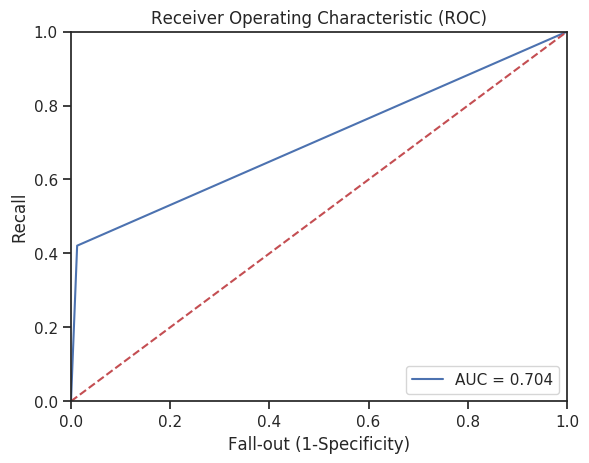

AUC score: 0.7042671629738647


In [0]:
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test_exp3, y_pred)
roc_auc_rna = roc_auc_score(y_test_exp3,y_pred)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_rna)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_rna)

In [0]:
gini_rna = (roc_auc_rna - 0.5) * 2
accuracy_rna = metrics.accuracy_score(y_test_exp3, y_pred)
f1_score_rna = metrics.f1_score(y_test_exp3, y_pred)
recall_score_rna = metrics.recall_score(y_test_exp3, y_pred)

In [0]:
all_weights = []
rna_weights = model.get_weights()
all_weights.extend([rna_weights])

dataframe_rna_weights = pd.DataFrame(rna_weights[10], columns=['rna_weights']) 
print (dataframe_rna_weights)
dataframe_rna_weights.to_csv('metada_rna_weights.csv', index = None, header=True)

     rna_weights
0       0.061223
1      -0.027808
2      -0.203556
3      -0.058909
4      -0.064999
..           ...
123     0.112980
124    -0.147871
125    -0.125191
126     0.096237
127    -0.185743

[128 rows x 1 columns]


## Comparación de resultados

In [0]:
comparison = {'Accuracy score': (accuracy_exp3, accuracy_rna),'AUC score': (roc_auc_exp3, roc_auc_rna),'Recall score':(recall_score_exp3, recall_score_rna),'F1 score':(f1_score_exp3, f1_score_rna)}
comparison["Gini"]=(gini_exp3,gini_rna)
comparison["execution time"]=(execution_time_exp3, execution_time_rna)

In [0]:
comparison = DataFrame(comparison, index = ['Máquina de Soporte Vectorial', 'Red Neuronal Multicapa'])
comparison.T

,Máquina de Soporte Vectorial,Red Neuronal Multicapa
Accuracy score,0.888108,0.827261
AUC score,0.837699,0.704267
Recall score,0.721569,0.420915
F1 score,0.784927,0.579658
Gini,0.675399,0.408534
execution time,0 days 00:00:16.218909,0 days 00:39:30.152152


## Guardar modelos

In [0]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

# save the model to disk
filename = 'metadata_model_svm_v1.sav'
pickle.dump(clf, open(filename, 'wb'))

# save the model to disk
model.save('metadata_model_rna_v1.h5')